# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify. 

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)


### Группировка бумаг по внутренней структуре рынка


## Downloading data

HRP only requires historical returns

In [1]:
# !pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.3'

In [3]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]


tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT",
           'JNJ', 'JPM', 'KDP', 'KEY', 'KHC',
           'KIDS', 'KMB', 'KO', 'KR', 'LEN',
           'LKQ', 'LMT', 'LNT', 'LOW', 'LPLA', 'MAT', ]




ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  31 of 31 completed


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,JNJ,JPM,...,LOW,LPLA,MA,MAT,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-15,173.190002,101.010002,36.250000,755.820007,106.269997,124.260002,489.230011,57.980000,166.089996,122.459999,...,208.039993,225.779999,359.950012,23.209999,190.320007,3.420570,172.309998,160.460007,47.810001,132.600006
2022-08-16,173.029999,100.199997,36.639999,757.070007,106.430000,124.959999,488.179993,57.290001,167.570007,123.629997,...,214.119995,229.130005,359.250000,23.799999,188.789993,3.440285,180.190002,159.419998,47.650002,139.369995
2022-08-17,174.550003,98.269997,36.410000,743.219971,104.919998,122.809998,478.299988,56.150002,167.580002,122.589996,...,215.369995,231.820007,355.329987,23.469999,183.350006,3.479715,175.339996,160.770004,47.650002,139.520004
2022-08-18,174.149994,100.440002,36.279999,745.219971,103.639999,122.669998,477.760010,55.189999,166.770004,121.639999,...,216.470001,231.949997,357.359985,24.100000,187.729996,3.460000,173.050003,159.130005,47.349998,139.070007
2022-08-19,171.520004,95.949997,35.480000,713.849976,104.050003,120.139999,463.950012,54.700001,169.309998,118.629997,...,211.360001,224.389999,354.279999,24.209999,178.490005,3.330000,167.039993,156.460007,47.410000,137.020004


In [4]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,JNJ,JPM,...,LOW,LPLA,MA,MAT,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-15,0.006334,0.001785,-0.001377,0.005307,-0.001128,0.022127,0.005281,0.016301,0.004779,0.002702,...,0.007604,-0.006811,0.016033,-0.014019,0.017264,0.005797,0.005276,-0.005269,0.000628,0.002874
2022-08-16,-0.000924,-0.008019,0.010759,0.001654,0.001506,0.005633,-0.002146,-0.011901,0.008911,0.009554,...,0.029225,0.014837,-0.001945,0.025420,-0.008039,0.005764,0.045732,-0.006481,-0.003347,0.051056
2022-08-17,0.008785,-0.019261,-0.006277,-0.018294,-0.014188,-0.017206,-0.020238,-0.019899,0.000060,-0.008412,...,0.005838,0.011740,-0.010912,-0.013866,-0.028815,0.011461,-0.026916,0.008468,0.000000,0.001076
2022-08-18,-0.002292,0.022082,-0.003570,0.002691,-0.012200,-0.001140,-0.001129,-0.017097,-0.004833,-0.007749,...,0.005108,0.000561,0.005713,0.026843,0.023889,-0.005666,-0.013060,-0.010201,-0.006296,-0.003225
2022-08-19,-0.015102,-0.044703,-0.022051,-0.042095,0.003956,-0.020624,-0.028906,-0.008878,0.015231,-0.024745,...,-0.023606,-0.032593,-0.008619,0.004564,-0.049220,-0.037572,-0.034730,-0.016779,0.001267,-0.014741


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [5]:
from pypfopt import HRPOpt

In [6]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.0152),
             ('AMD', 0.00717),
             ('BAC', 0.01164),
             ('BLK', 0.02013),
             ('CVS', 0.04488),
             ('DIS', 0.02991),
             ('INTU', 0.01361),
             ('JD', 0.01902),
             ('JNJ', 0.07975),
             ('JPM', 0.01584),
             ('KDP', 0.05146),
             ('KEY', 0.01059),
             ('KHC', 0.03436),
             ('KIDS', 0.01509),
             ('KMB', 0.05607),
             ('KO', 0.05674),
             ('KR', 0.0664),
             ('LEN', 0.01619),
             ('LKQ', 0.02302),
             ('LMT', 0.04634),
             ('LNT', 0.08131),
             ('LOW', 0.0216),
             ('LPLA', 0.01518),
             ('MA', 0.02031),
             ('MAT', 0.02398),
             ('NVDA', 0.00691),
             ('PBI', 0.02721),
             ('TGT', 0.02699),
             ('TM', 0.03891),
             ('UL', 0.06959),
             ('WMT', 0.03461)])

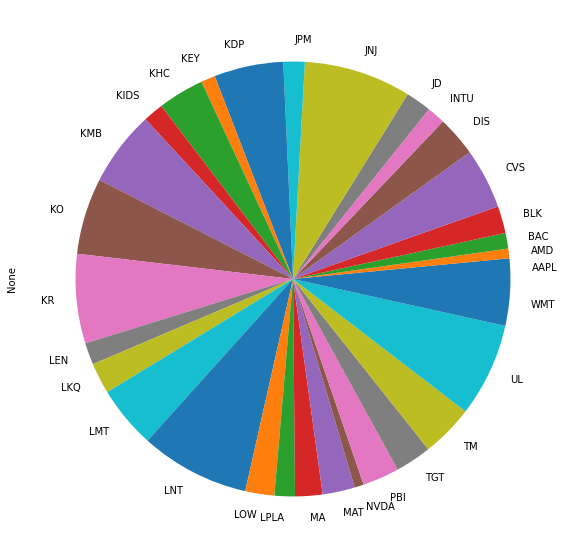

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 17.5%
Annual volatility: 16.2%
Sharpe Ratio: 0.96


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

In [9]:
# from matplotlib.pyplot import figure, rc
# figure(figsize=(20, 12), dpi=80)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# rc('font', **font)

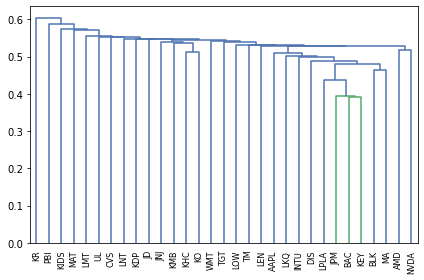

In [10]:
from pypfopt import plotting

# figure(figsize=(20, 12))
plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.